## Pregunta generadora

### - Predecir número de suicidios de un país en un año, dado indicadores como número de población, PBI por año, PBI per capita


#### conjunto de datos https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016#master.csv

### Procesamiento de los datos

In [2]:
import pandas as pd

data = pd.read_csv('./data.csv')

Vemos un muestra de las primeras observaciones del conjunto de datos

In [2]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


Rotamos la variable a predecir **suicides_no** a la ultima columna

In [3]:
cols = list(data)
cols.insert(len(cols) - 1, cols.pop(cols.index('suicides_no')))
data = data.loc[:, cols]
data.head()

,country,year,sex,age,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,suicides_no
0,Albania,1987,male,15-24 years,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,21
1,Albania,1987,male,35-54 years,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,16
2,Albania,1987,female,15-24 years,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,14
3,Albania,1987,male,75+ years,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,1
4,Albania,1987,male,25-34 years,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,9


Eliminamos las columnas que no son de nuestro interes, ya que para simplificar usaremos solo las variables numericas, las variables categoricas seran completamente removidas en pasos posteriores, ya que seran necesarias para relizar una agrupacion para tomar en cuenta todas las personas

In [4]:
del data['country']
del data['year']
del data['HDI for year']
del data['generation']
data.head()

,sex,age,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),suicides_no
0,male,15-24 years,312900,6.71,Albania1987,"2,156,624,900",796,21
1,male,35-54 years,308000,5.19,Albania1987,"2,156,624,900",796,16
2,female,15-24 years,289700,4.83,Albania1987,"2,156,624,900",796,14
3,male,75+ years,21800,4.59,Albania1987,"2,156,624,900",796,1
4,male,25-34 years,274300,3.28,Albania1987,"2,156,624,900",796,9


Limpiamos los nombres de las columnas, quitando los espacios en blanco

In [5]:
data.columns = data.columns.str.replace(' ', '')
data.head()

,sex,age,population,suicides/100kpop,country-year,gdp_for_year($),gdp_per_capita($),suicides_no
0,male,15-24 years,312900,6.71,Albania1987,"2,156,624,900",796,21
1,male,35-54 years,308000,5.19,Albania1987,"2,156,624,900",796,16
2,female,15-24 years,289700,4.83,Albania1987,"2,156,624,900",796,14
3,male,75+ years,21800,4.59,Albania1987,"2,156,624,900",796,1
4,male,25-34 years,274300,3.28,Albania1987,"2,156,624,900",796,9


En la columna **gdp_for_year($)** realizamos una transformacion del tipo de dato, para esto eliminamos las comas y luego lo convertimos a tipo entero

In [6]:
data['gdp_for_year($)'] = data['gdp_for_year($)'].str.replace(',', '')
data['gdp_for_year($)'] = data['gdp_for_year($)'].astype('int')
data.dtypes

sex                   object
age                   object
population             int64
suicides/100kpop     float64
country-year          object
gdp_for_year($)        int64
gdp_per_capita($)      int64
suicides_no            int64
dtype: object

Para tomar en cuenta todas las personas para un mismo **country-year** realizamos la siguiente agrupacion

In [7]:
data = data.groupby(
   ['country-year'],
    as_index=False
).agg(
    {
         'population': 'sum',    
         'suicides/100kpop': 'sum',  
         'gdp_for_year($)': 'median',
         'gdp_per_capita($)': 'median',
         'suicides_no': 'sum'
    }
)
data.head()

,country-year,population,suicides/100kpop,gdp_for_year($),gdp_per_capita($),suicides_no
0,Albania1987,2709600,31.85,2156624900,796,73
1,Albania1988,2764300,32.46,2126000000,769,63
2,Albania1989,2803100,33.40,2335124988,833,68
3,Albania1992,2822500,18.00,709452584,251,47
4,Albania1993,2807300,32.56,1228071038,437,73


Ya podemos elminar la variable categorica **country-year** 

In [8]:
del data['country-year']
data.head()

,population,suicides/100kpop,gdp_for_year($),gdp_per_capita($),suicides_no
0,2709600,31.85,2156624900,796,73
1,2764300,32.46,2126000000,769,63
2,2803100,33.40,2335124988,833,68
3,2822500,18.00,709452584,251,47
4,2807300,32.56,1228071038,437,73


Con esto terminamos la fase de procesamiento de los datos

### Analisis exploratorio

In [9]:
data.describe()

,population,suicides/100kpop,gdp_for_year($),gdp_per_capita($),suicides_no
count,2.321000e+03,2321.000000,2.321000e+03,2321.000000,2321.000000
mean,2.211209e+07,153.616471,4.452791e+11,16876.573460,2907.548470
std,4.167543e+07,116.936498,1.453108e+12,18896.450283,7077.828004
min,2.519200e+04,0.000000,4.691962e+07,251.000000,0.000000
25%,1.996086e+06,65.910000,8.992642e+09,3450.000000,118.000000
50%,5.360200e+06,131.900000,4.811469e+10,9378.000000,565.000000
75%,2.056996e+07,213.220000,2.602024e+11,24874.000000,2247.000000
max,3.000785e+08,639.300000,1.812071e+13,126352.000000,61420.000000


In [10]:
data.corr()

,population,suicides/100kpop,gdp_for_year($),gdp_per_capita($),suicides_no
population,1.000000,0.077350,0.800281,0.091413,0.808095
suicides/100kpop,0.077350,1.000000,0.049365,0.002766,0.343985
gdp_for_year($),0.800281,0.049365,1.000000,0.303126,0.657589
gdp_per_capita($),0.091413,0.002766,0.303126,1.000000,0.093461
suicides_no,0.808095,0.343985,0.657589,0.093461,1.000000


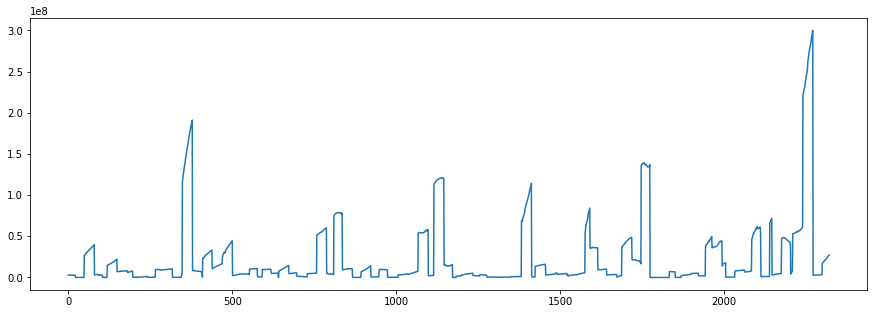

In [24]:
import matplotlib.pyplot as plt

plt.plot(data['population'])
plt.rcParams["figure.figsize"] = (15, 5)
plt.show()

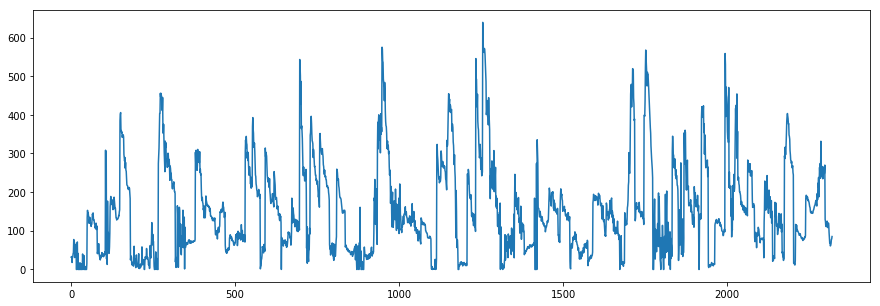

In [23]:
plt.plot(data['suicides/100kpop'])
plt.rcParams["figure.figsize"] = (15, 5)
plt.show()

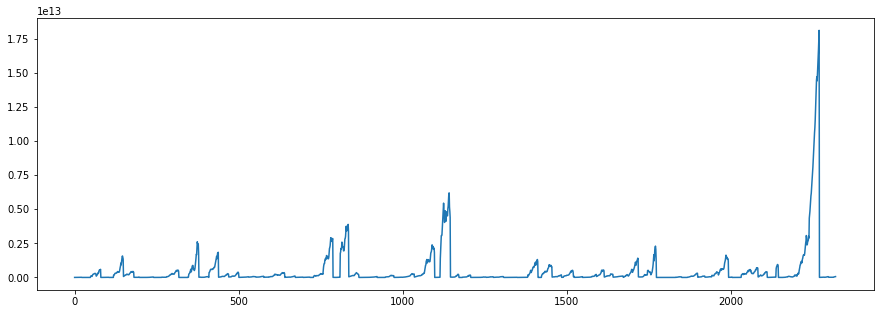

In [22]:
plt.plot(data['gdp_for_year($)'])
plt.rcParams["figure.figsize"] = (15, 5)
plt.show()

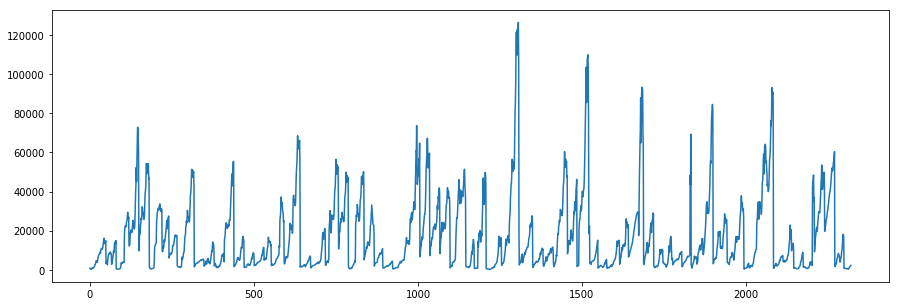

In [21]:
plt.plot(data['gdp_per_capita($)'])
plt.rcParams["figure.figsize"] = (15, 5)
plt.show()

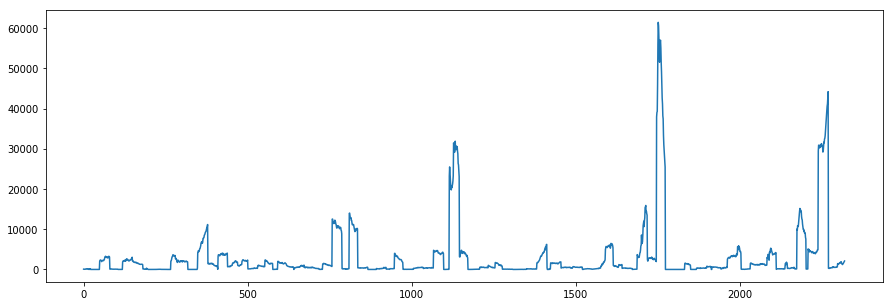

In [20]:
plt.plot(data['suicides_no'])
plt.rcParams["figure.figsize"] = (15, 5)
plt.show()

### Conjuntos de datos

Procederemos a conformar dos conjuntos de datos, tomando muestras aleatorias de la data procesada.

Un conjunto de entranamiento con el 70% del tamaño total y un conjunto de pruebas con el 30% del tamaño total.

In [17]:
# Entrenamiento
dataT = data.sample(frac=0.7, replace=False, random_state=1)

#Pruebas
dataTest = data.sample(frac=0.3, replace=False, random_state=2)

### Modelado

Para la fase de modelado se require separar los datos de las variables independientes **X** de la variable dependiente **y**

In [18]:
y = dataT['suicides_no'].values

In [19]:
del dataT['suicides_no']
X = dataT.values

El modelo seleccionado es **ElasticNet**

Procedemos a entrenar el modelo con los conjunto **X** e **y**

In [20]:
from sklearn import linear_model
regr = linear_model.ElasticNet(random_state=0)
regr.fit(X, y)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False)

### Evaluacion

Obtenemos el conjunto de variables independientes **X** del conjunto de pruebas **dataTest**

In [21]:
del dataTest['suicides_no']
X = dataTest.values

Para un observacion aleatoria del conjunto de pruebas

In [36]:
import random

test = X[random.randint(1,101)]

print(test)

[3.92600000e+05 3.07600000e+02 1.97319125e+10 5.02600000e+04]


Tenemos el siguiente resultado

In [37]:
regr.predict([test])

array([2798.0548395])